In [1]:
import numpy as np


In [6]:
from sklearn.datasets import make_classification

## Generating Synthetic dataset

In [8]:
x, y = make_classification(n_samples=2000,n_classes=2,n_features = 10,random_state=0)

## Adding nosy to the features data to make the problem more deffficult and real.

In [9]:
random_state = np.random.RandomState(0)
n_samples, n_features = x.shape
x = np.c_[x,random_state.randn(n_samples,200*n_features)]

In [10]:
x.shape

(2000, 2010)

## Datat spliting

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=0)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [15]:
## building the model using RandomForestClassifer Algo

rf = RandomForestClassifier(max_features=5,n_estimators =500)
rf.fit(x_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

In [16]:
## building the model using GaussianNB Algo
nb = GaussianNB()

In [17]:
nb.fit(x_train,y_train)

GaussianNB()

## Prediction probabilities


In [22]:
r_probs = [ 0 for _ in range(len(y_test))]

In [25]:
rf_probs = rf.predict_proba(x_test)
nb_probs = nb.predict_proba(x_test)

In [26]:
### probabilities for the positive outcome is kept
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]


In [27]:
rf_probs

array([0.43 , 0.474, 0.5  , 0.478, 0.542, 0.568, 0.504, 0.544, 0.57 ,
       0.444, 0.516, 0.452, 0.516, 0.55 , 0.432, 0.47 , 0.494, 0.534,
       0.52 , 0.536, 0.482, 0.58 , 0.488, 0.428, 0.45 , 0.526, 0.472,
       0.506, 0.534, 0.456, 0.478, 0.534, 0.492, 0.456, 0.468, 0.548,
       0.558, 0.452, 0.474, 0.518, 0.474, 0.478, 0.484, 0.49 , 0.574,
       0.526, 0.568, 0.5  , 0.532, 0.544, 0.46 , 0.446, 0.438, 0.494,
       0.556, 0.516, 0.514, 0.454, 0.494, 0.52 , 0.58 , 0.526, 0.508,
       0.472, 0.466, 0.516, 0.574, 0.44 , 0.506, 0.526, 0.564, 0.482,
       0.47 , 0.528, 0.534, 0.472, 0.458, 0.558, 0.466, 0.464, 0.49 ,
       0.502, 0.528, 0.562, 0.494, 0.524, 0.48 , 0.482, 0.514, 0.56 ,
       0.46 , 0.484, 0.494, 0.496, 0.472, 0.468, 0.472, 0.514, 0.494,
       0.478, 0.502, 0.486, 0.45 , 0.572, 0.542, 0.556, 0.504, 0.5  ,
       0.424, 0.516, 0.5  , 0.456, 0.532, 0.472, 0.562, 0.49 , 0.442,
       0.5  , 0.492, 0.484, 0.458, 0.498, 0.482, 0.51 , 0.46 , 0.464,
       0.554, 0.47 ,

### Computig AUROC and ROC curve values


In [28]:
from sklearn.metrics import roc_curve,roc_auc_score

### Calculating AUCROC

#### __ROC:__ is Receiver Characteristics Curve
#### __AUC:__ is Area Under the Curve

In [29]:
r_auc = roc_auc_score(y_test,r_probs)
rf_auc = roc_auc_score(y_test,rf_probs)
nb_auc = roc_auc_score(y_test,nb_probs)

### Printing the AUROC score

In [30]:
print('Random(chance) Prediction:AUROC =%3f'%(r_auc))
print("*"*50)
print('Random Forest:AUROC = %3f'%(rf_auc))
print("*"*50)
print('Naive Bayes: AUROC = %3f'%(nb_auc))

Random(chance) Prediction:AUROC =0.500000
**************************************************
Random Forest:AUROC = 0.923531
**************************************************
Naive Bayes: AUROC = 0.993242


### Calculating the ROC curve

In [31]:
r_fpr,r_tpr,_ = roc_curve(y_test,r_probs)
rf_fpr,rf_tpr,_ = roc_curve(y_test,rf_probs)
nb_fpr,nb_tpr,_ = roc_curve(y_test,nb_probs)

### Plotting ROC curve

In [32]:
import matplotlib.pyplot as plt

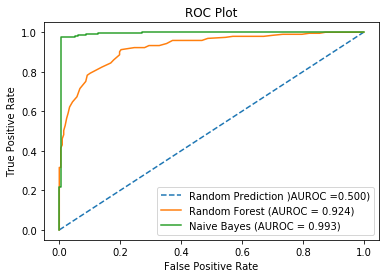

In [36]:
plt.plot(r_fpr,r_tpr,linestyle = '--',label ='Random Prediction )AUROC =%0.3f)'%r_auc)
plt.plot(rf_fpr,rf_tpr,linestyle = '-',label='Random Forest (AUROC = %0.3f)'%rf_auc)
plt.plot(nb_fpr,nb_tpr,linestyle = '-',label='Naive Bayes (AUROC = %0.3f)'%nb_auc)

## title
plt.title('ROC Plot')

## Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## show Legend
plt.legend()
plt.show()
